# Polynomial Regression
1 variable but uses different power

y = b0 + x1*b1 + x1^2*b2 ... x1^n*bn

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('Position_Salaries.csv')
# exclude 'Position' column
# instead of saying dataset.iloc[:,1], since we want metrix (not vector) for input value, do dataset.iloc[:,1:2]
# X should always be metrix, y should be vector
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [14]:
np.array(X).reshape(-1,1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

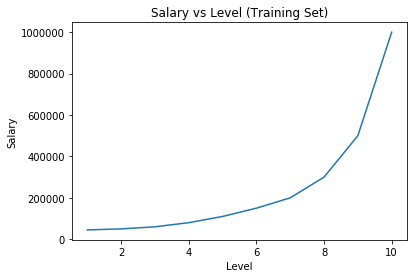

In [6]:
# visualize the training set
# you can see it requires polynomial regression
plt.plot(dataset.iloc[:,1].values,dataset.iloc[:,2].values)
plt.title('Salary vs Level (Training Set)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [10]:
# build a model
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(np.array(X).reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# create new independent variables that are powers of x
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(np.array(X).reshape(-1,1))

In [13]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [16]:
ln2 = LinearRegression()
ln2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

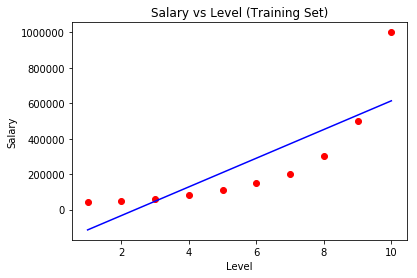

In [19]:
# plot the chart
plt.scatter(X,y, color = "red")
plt.plot(X, ln.predict(np.array(X).reshape(-1,1)), color = "blue")
plt.title('Salary vs Level (no polynomial)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

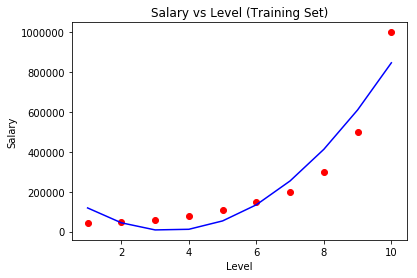

In [23]:
# works way better
plt.scatter(X,y, color = "red")
plt.plot(X, ln2.predict(poly_reg.fit_transform(np.array(X).reshape(-1,1))), color = "blue")
plt.title('Salary vs Level (Training Set)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()